# Plant Seedling Image Classification using CNNs in Keras

In [1]:
# Properly convert png to npy numpy array (Image to Array)
# https://stackoverflow.com/questions/47858996/properly-convert-png-to-npy-numpy-array-image-to-array

##### (This section was for personal documentation in order to make OpenCV to run in my machine.)
### Dokumentation zur Systemkonfiguration, OpenCV Installation:

Beginnen Sie mit der rechten Maustaste. (Wählen Sie als Administrator die Command Prompt aus.)
Führen Sie den folgenden Befehl aus:

    C:\ProgramData\Anaconda3\Scripts\activate.bat

Jetzt man kann OpenCV installieren mit:

Möglichkeit 1 Die einfachste und direkt.

    pip install opencv-python

Schön!! Es ist schon da!!  :) Schnel, Einfach und Direkt!!

Möglichkeit 2.

    conda install -c conda-forge opencv

oder

    conda install -c conda-forge opencv=3.4.X (opencv=numVer.x.x)

(Quelle: https://medium.com/@pranav.keyboard/installing-opencv-for-python-on-windows-using-anaconda-or-winpython-f24dd5c895eb    Notig: https://winaero.com/blog/how-to-edit-environment-variables-quickly-in-windows-8-1-and-windows-8/)

Es hat nicht funktioniert. :( OpenCV ist zu groß!!! Oder die Daten existieren nichts mehr auf den Aufbewahrungsort. Ich habe eine Notiz bekommen, es lautet: "PackagesNotFoundError: The following packages are not available from current channels."

Möglichkeit 3.

Noch andere möglichkeit, Ich habe es probiert. Aber Problem ist dass ich habe die Anaconda Daten installiert für alle Benutzer in meine Computer. Und die daten waren nicht auf:

    C:\Users\Johnny\Anaconda\Lib\site-packages

aber in

    C:\ProgramData\Anaconda3\Lib\site-packages

Ich glaube es funktioniert, aber nicht am ende probiert.

(Quelle: https://stackoverflow.com/questions/23119413/how-do-i-install-python-opencv-through-conda     Die selbe Informationen, aber mit Bilder:    https://mathalope.co.uk/2015/05/07/opencv-python-how-to-install-opencv-python-package-to-anaconda-windows/ Ist das nicht Plagiat?)


Jetzt man kann prüfen mit:

In Python für OpenCV:

    python
    print(cv2.__version__)
   

In die Konsole (Command Prompt).

    conda --version
    python --version

In Python

    python
    import tensorflow as tf
    print(tf.__version__)

Man kann auch machen:

    python
    import keras
    keras.__version__

aber in die lezte Versionen Keras kommt zusammen mit TensorFlow.

Drucken Sie Ctlr+Z, oder Ctrl+Z plus Return von Python zu herauskommen.

<h2 style="color:red;">I was not able to DEFINE the dataset to be split into Test, Train and Validate data sets. Nevertheless, almost all of the code here displayed was tested with other datasets or in this notebook in previous parts. I REQUEST A DETAILED REVIEW.</h2>

## 1. Import the libraries, load dataset, print shape of data, visualizing the images in dataset.

In [2]:
# nötig
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
# nötig
import cv2 as cv2
print(cv2.__version__)

4.4.0


In [4]:
# nötig
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Using Tensorflow Keras instead of the original Keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential                 # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Dense, Dropout #, BatchNormalization
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.

In [5]:
img_array = np.load('images.npy')
dfLabels = pd.read_csv("Labels.csv")

In [6]:
img_array.shape

(4750, 128, 128, 3)

In [7]:
# img_array

In [8]:
dfLabels.shape

(4750, 1)

In [9]:
dfLabels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [10]:
dfLabels.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [11]:
dfLabels.isnull().values.any()

False

In [12]:
for col in dfLabels:
    print(col," = ",dfLabels[col].unique())

Label  =  ['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


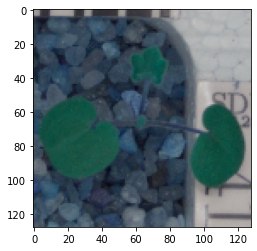

In [13]:
plt.imshow(img_array[2], cmap=None)
plt.show()

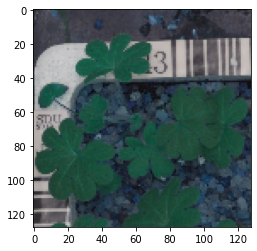

In [14]:
plt.imshow(img_array[3], cmap='gray')
plt.show()

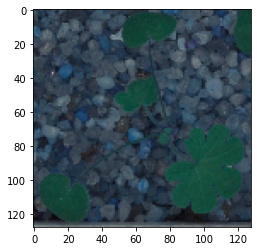

In [15]:
plt.imshow(img_array[33], cmap='gray')
plt.show()

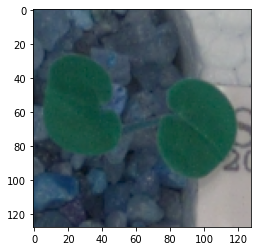

In [16]:
plt.imshow(img_array[36], cmap='gray')
plt.show()

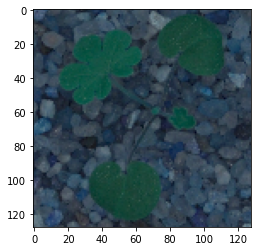

In [17]:
plt.imshow(img_array[59], cmap='gray')
plt.show()

In [18]:
#Curiosity

from PIL import Image
im = Image.fromarray(img_array[2])
# This might fail if `img_array` contains a data type that is not supported by PIL,
# in which case you could try casting it to a different dtype e.g.:
# im = Image.fromarray(img_array.astype(np.uint8))
im.show()

In [19]:
cv2.imshow('image',img_array[2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# # Interesant, wie die .imshow Methode funktioniert.
# plt.imshow(img_array[2])

In [23]:
# Interesant, wie die .imshow Methode funktioniert.
# plt.imshow(img_array[2])
# plt.show()

In [24]:
# Interesant, wie die .imshow Methode funktioniert.
# plt.imshow(img_array[0], cmap='gray')
# plt.show()

## 2. Applying filters, Data Pre-processing:

### a. Normalization (Gray scaling) & b. Blurring

In [25]:
img_arrayGrayB = []

In [26]:
img_arrayGrayB

[]

In [27]:
# Vorsicht!!!
# Quelle: https://stackoverflow.com/questions/42518744/making-a-list-and-appending-to-it-in-tensorflow
# img_arrayGrayB = []
for i in range(4750):
  imagen = cv2.cvtColor(img_array[i], cv2.COLOR_BGR2GRAY)
  imagenBlurred = cv2.GaussianBlur(imagen, (11, 11), 0)
  img_arrayGrayB.append(imagenBlurred)
img_arrayGrayB = tf.stack(img_arrayGrayB)

In [28]:
img_arrayGrayB.shape

TensorShape([4750, 128, 128])

In [29]:
# Interesant, wie die .imshow Methode funktioniert.
# plt.imshow(img_arrayGrayB[2])
# plt.show()

In [30]:
# Interesant, wie die .imshow Methode funktioniert.
# plt.imshow(img_arrayGrayB[2], cmap=None)
# plt.show()

In [31]:
# Uncomment the following to check

In [32]:
# Why is this not working?  This was working before?!?!?!?!
#im3 = Image.fromarray(img_arrayGrayB[2])

In [33]:
# Why is this not working?  This was working before?!?!?!?!
#cv2.imshow("image",img_arrayGrayB[2])
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### c. Visualizing data after pre-processing

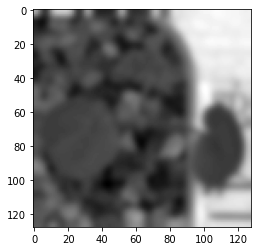

In [34]:
plt.imshow(img_arrayGrayB[2], cmap='gray')
plt.show()

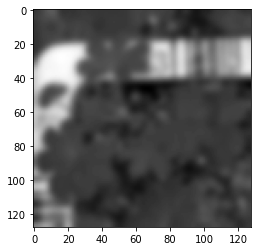

In [35]:
plt.imshow(img_arrayGrayB[3], cmap='gray')
plt.show()

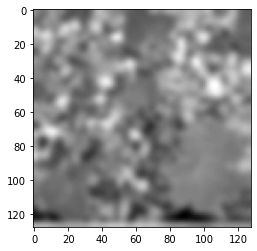

In [36]:
plt.imshow(img_arrayGrayB[33], cmap='gray')
plt.show()

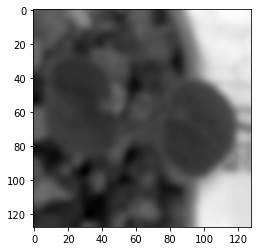

In [37]:
plt.imshow(img_arrayGrayB[36], cmap='gray')
plt.show()

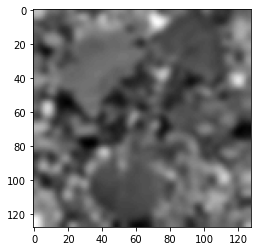

In [38]:
plt.imshow(img_arrayGrayB[59], cmap='gray')
plt.show()

## 3. Make data compatible:

In [39]:
dfLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [40]:
dfLabels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [41]:
for col in dfLabels:
    print(col," = ",dfLabels[col].unique())

Label  =  ['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


### a. Convert labels to one-hot-vectors.

In [42]:
#dataFrame = pd.get_dummies(dataFrame, columns=['columnName'])
dfLabels2 = pd.get_dummies(dfLabels)
# cData.head()
dfLabels2

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


<h2 style="color:red;">b. Print the label for y_traing[0]</h2>

<h2 style="color:red;">c. Splitting the dataset into training, testing and validation datasets. This cannot be done before reshaping the data. This is a code suggested being the only one I was not able to verify in practice. This is the way I would do it.</h2>

In [ ]:
# nötig
# Specify the data 
X=TensorSeedlingsIMAGESforTraining

# Specify the target labels and flatten array
x=TensorSeedlingsIMAGESforTesting

# Splitting the data up in train and test sets
X_train, X_testVal, x_train, x_testVal = train_test_split(X, x, test_size=0.30, random_state=42)

# Splitting the data into testing and validation test sets
X_test, x_test, X_validation, x_validation = train_test_split(X_testVal, x_testVal, test_size=0.50, random_state=42)


<h3 style="color:red;">The following would be the test, training and validation sets.</h3>

In [ ]:
X_train.shape

In [ ]:
x_train.shape

In [ ]:
X_test.shape

In [ ]:
x_test.shape

In [ ]:
X_validation

In [ ]:
x_validation

<h2 style="color:red;">d. Checking the data. Reshape data.</h2>
    
<h3 style="color:red;">Actually it is my opinion that one should reshape the data before trying to split it into train test and validation datasets. I tried several things, though was not succesful, my attemps are after question 6 at the end of the notebook.</h3>

## 4. Building a Sequential CNN classifier with input shape as 128 X 128 and using three sets of Convoltutional + Pooling layers.

### Using additionaly a Dropout in the fully connected layers.

### The final layer shape was made to match with the number of classes, i. e. 12


#### Importing required Keras modules (Attention, this was done at the very beginning.)

    from tensorflow.keras.models import Sequential      # Sequential groups a linear stack of layers into a tf.keras.Model.
    from tensorflow.keras.layers import Conv2D          # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
    from tensorflow.keras.layers import MaxPooling2D    # Max pooling operation for 2D spatial data.
    from tensorflow.keras.layers import Flatten         # Flattens the input. Does not affect the batch size.
    from tensorflow.keras.layers import Dense, Dropout 

In [ ]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

### Setting the optimizer and loss function. (Using the Adam optimizer and categorical crossentropy.)

In [ ]:
# Compile model (using the efficient Adam gradient descent optimization algorithm
# with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.)
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 5. Fitting the model, evaluating and confussion matrix. I was able to run this code with the MNIST dataset.

### But as I was not able to obtain the data set, I simply made a comment here. In the lines refering to.

### training_set & test_set a legend reads: _I could not defined this!!!!_

    training_set = train_datagen.flow_from_directory('I could not defined this!!!!',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

    test_set = test_datagen.flow_from_directory('I could not define this!!!!',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # Generate batches of tensor image data with real-time data augmentation.


# Create data generator for training data with data augmentation and normalizing all
# values by 255
#train_datagen = ImageDataGenerator(rescale = 1./255,
#                                   shear_range = 0.2,
#                                   zoom_range = 0.2,
#                                   horizontal_flip = True)

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory ("." means the current directory. ("./dataset" means that dataset is inside current directory))
# Setting the target size to resize all the images to (64,64) as the model input layer expects 64X64 images

training_set = train_datagen.flow_from_directory('I could not defined this!!!!',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# "./dataset/test" means that test is inside dataset inside current directory.
# Setting testing data generator's source directory
test_set = test_datagen.flow_from_directory('I could not define this!!!!',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# There are 1098 training images and 272 test images in total
classifier.fit(training_set,
                         steps_per_epoch = int(3325/32),
                         epochs = 10,
                         validation_data = not defined yet!!!!,
                         validation_steps = int(1425/32))

### Evaluating the model. (This code was tested with the MNIST dataset)

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Confusion Matrix. (Code used in previous projects, p. e. Introduction to Neural Networks, the code was tested with the MNIST dataset)

In [ ]:
dfConfMatrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

#dfConfMatrix = pd.DataFrame(confMatrix,
#                           index = [i for i in ["Actual 1","Actual 0"]],     # Another alternative way to plot y labels
#                           columns = [i for i in ["Predict 1","Predict 0"]]  # Another alternative way to plot x labels
#                           )
plt.figure(figsize = (7,5))  # This determines the size of the figure, goes always before sns.---
#sns.heatmap(dfConfMatrix, annot=True);   # For the alternative way to print labels.
sns.heatmap(dfConfMatrix, annot=True, xticklabels = ["Predict 1", "Predict 0"] , yticklabels = ["Actual 1", "Actual 0"]);

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

## 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

## This code can be found at the beginning of this notebook.

<h3 style="color:red;">Only difference would be that the image displayed could be displayed with the label included.</h3>

In [ ]:
print("Label: {}".format(y_test[2]))
plt.imshow(x_test[2], cmap=None)
plt.show()

In [ ]:
print("Label: {}".format(y_test[3]))
plt.imshow(x_test[3], cmap=None)
plt.show()

In [ ]:
print("Label: {}".format(y_test[33]))
plt.imshow(x_test[33], cmap=None)
plt.show()

In [ ]:
print("Label: {}".format(y_test[36]))
plt.imshow(x_test[36], cmap=None)
plt.show()

In [ ]:
print("Label: {}".format(y_test[59]))
plt.imshow(x_test[59], cmap=None)
plt.show()

<h1 style="color:red;">Attempts to reshape the data.</h1>

In [ ]:
Labels2Array = dfLabels2.to_numpy()

In [ ]:
Labels2Array.shape

In [ ]:
Labels2Array

In [ ]:
dfLabelsRep1 = dfLabels.replace('Small-flowered Cranesbill', 0)
dfLabelsRep2 = dfLabelsRep1.replace('Fat Hen', 1)
dfLabelsRep3 = dfLabelsRep2.replace('Shepherds Purse', 2)
dfLabelsRep4 = dfLabelsRep3.replace('Common wheat', 3)
dfLabelsRep5 = dfLabelsRep4.replace('Common Chickweed', 4)
dfLabelsRep6 = dfLabelsRep5.replace('Charlock', 5)
dfLabelsRep7 = dfLabelsRep6.replace('Cleavers', 6)
dfLabelsRep8 = dfLabelsRep7.replace('Scentless Mayweed', 7)
dfLabelsRep9 = dfLabelsRep8.replace('Sugar beet', 8)
dfLabelsRep10 = dfLabelsRep9.replace('Maize', 9)
dfLabelsRep11 = dfLabelsRep10.replace('Black-grass', 10)
dfNewLabels = dfLabelsRep11.replace('Loose Silky-bent', 11)

In [ ]:
#dfNewLabels

In [ ]:
for col in dfNewLabels:
    print(col," = ",dfNewLabels[col].unique())

In [ ]:
dfNewLabels.info()

In [ ]:
NewLabelsArray = dfNewLabels.to_numpy()

In [ ]:
NewLabelsArray.shape

In [ ]:
NewLabelsArray

In [ ]:
nla1 = tf.expand_dims(NewLabelsArray, axis=1)

In [ ]:
nla1.shape

In [ ]:
nla1

In [ ]:
nla2 = tf.expand_dims(nla1, axis=1)

In [ ]:
nla2.shape

In [ ]:
nla2

In [ ]:
#np.concatenate((tensor, matrix[None]),axis=0
np.vstack((nla1, img_arrayGrayB[None]))

In [ ]:
#nla1Reshaped = tf.reshape(nla1, (4750,128,128))

In [ ]:
#merged = tf.keras.layers.Concatenate(axis=1)([img_arrayGrayB,nla1])

In [ ]:
#a = tf.constant([[1, 2], [3, 4]])

# Reshape `a` as a vector. -1 means "set this dimension automatically".
#a_as_vector = tf.reshape(a, [-1])

# Create another vector containing zeroes to pad `a` to (2 * 3) elements.
#zero_padding = tf.zeros([2 * 3] - tf.shape(a_as_vector), dtype=a.dtype)

# Concatenate `a_as_vector` with the padding.
#a_padded = tf.concat([a_as_vector, zero_padding], 0)

# Reshape the padded vector to the desired shape.
#result = tf.reshape(a_padded, [2, 3])



# a = tf.constant([[1, 2], [3, 4]])

# Reshape `a` as a vector. -1 means "set this dimension automatically".
NewLabelsArrayReshaped = tf.reshape(NewLabelsArray, [4750, 128, 128])

# Create another vector containing zeroes to pad `a` to (2 * 3) elements.
zero_padding = tf.zeros([4750*128*128] - tf.shape(NewLabelsArrayReshaped), dtype=a.dtype)

# Concatenate `a_as_vector` with the padding.
a_padded = tf.concat([NewLabelsArrayReshaped, zero_padding], 0)

# Reshape the padded vector to the desired shape.
NewLabelsArrayReshapedPadded = tf.reshape(a_padded, [4750, 128, 128])

In [ ]:
# img_arrayGrayB.shape
# TensorShape([4750, 128, 128]

# Labels2Array.shape
# (4750, 12)

# ValueError: all the input array dimensions for the concatenation axis must match exactly, but
# along dimension 1, the array at index 0 has size 128 and the array at index 1 has size 4750

#np.concatenate((img_arrayGrayB, Labels2Array[None]),axis=0)

# ValueError: all the input arrays must have same number of dimensions, but the array at index 0
# has 2 dimension(s) and the array at index 1 has 4 dimension(s)

#np.concatenate((Labels2Array, img_arrayGrayB[None]),axis=0)

# -----------------------------------------------------------------------------------------------
# NewLabelsArray.shape
# (4750, 1)

# ValueError: all the input array dimensions for the concatenation axis must match exactly, but
# along dimension 1, the array at index 0 has size 128 and the array at index 1 has size 4750

# np.concatenate((img_arrayGrayB, NewLabelsArray[None]),axis=0)

# ValueError: all the input arrays must have same number of dimensions, but the array at index 0
# has 2 dimension(s) and the array at index 1 has 4 dimension(s)

# np.concatenate((NewLabelsArray, img_arrayGrayB[None]),axis=0)

In [ ]:
#tf.expand_dims(dfLabels, axis=0).shape.as_list()

In [ ]:
#tf.reshape(dfNewLabels, [4750, 128, 128, 1])

In [ ]:
#tf.expand_dims(dfNewLabels, axis=0).shape.as_list()

In [ ]:
#merged = Concatenate()([dfNewLabels,img_arrayGrayB])

In [ ]:
# tf.stack([img_arrayGrayB, dfLabels], axis=0)

In [ ]:
h,w = 3,4
a = np.random.rand(0,h,w)
b = np.random.rand(h,w)
c = np.random.rand(1,h,w)
d = np.random.rand(h,w)

In [ ]:
tensor1 = np.concatenate((a, b[None]),axis=0).shape

In [ ]:
tensor1

In [ ]:
tensor2 = np.concatenate((c, d[None]),axis=0).shape

In [ ]:
tensor2

<h1 style="color:green;">Reference:</h1>

In [ ]:
img = cv2.imread('python.png')

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2.imshow('image',imgGray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
imgGrayGaussian = cv2.GaussianBlur(imgGray, (15, 15), 0)

In [ ]:
cv2.imshow('image',imgGrayGaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Quelle:
# https://stackoverflow.com/questions/63827440/add-a-new-dimension-to-a-tensor-will-modify-its-data

In [ ]:
x = tf.constant([3., 2.])
tf.expand_dims(x, 1).shape

In [ ]:
x

In [ ]:
x.shape

In [ ]:
x1 = tf.constant(np.array(range(1,9)))
x2 = tf.reshape(x1, (2,2,2))
x2

In [ ]:
x1

In [ ]:
x3 = tf.expand_dims(x2, axis = 0)
x3

In [ ]:
x4 = tf.reshape(x1, (1,2,2,2))
x4

In [ ]:
# Quelle:
#https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

In [ ]:
# Setup.
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['a', 'b', 'c'])

df.to_numpy()                              # Print example data

In [ ]:
# Quelle:
#https://stackoverflow.com/questions/34141430/tensorflow-tensor-reshape-and-pad-with-zeros

In [ ]:
a = tf.constant([[1, 2], [3, 4]])

# Reshape `a` as a vector. -1 means "set this dimension automatically".
a_as_vector = tf.reshape(a, [-1])

# Create another vector containing zeroes to pad `a` to (2 * 3) elements.
zero_padding = tf.zeros([2 * 3] - tf.shape(a_as_vector), dtype=a.dtype)

# Concatenate `a_as_vector` with the padding.
a_padded = tf.concat([a_as_vector, zero_padding], 0)

# Reshape the padded vector to the desired shape.
result = tf.reshape(a_padded, [2, 3])

In [ ]:
a

In [ ]:
result

In [ ]:
# Quelle:
# Quesion about the axis of tf.stack()
#https://stackoverflow.com/questions/50820781/quesion-about-the-axis-of-tf-stack

#error due to dimensions
#tf.stack([img_arrayGrayB, dfNewLabels])